In [99]:
import sys
sys.path.append('D:/Master/Blok3/AAS/')

In [100]:
import numpy as np
import matplotlib.pyplot as plt
#import healpy
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

## uniform distribution on a sphere in 3d

In [102]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

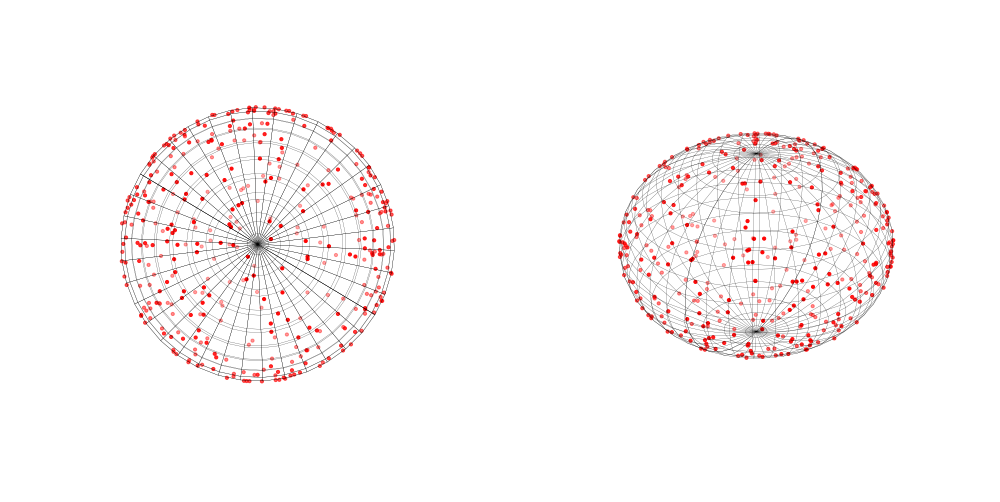

In [103]:
def sample_spherical(npoints, ndim=3):
    "Sample points uniformly on a sphere in ndim."
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(400)
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'3d'}, figsize = (14,10))
ax = ax.flatten()
ax[0].plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth = .2)
ax[0].scatter(xi, yi, zi, s=10, c='r', zorder=10)
ax[0].view_init(elev=90.)
ax[0].grid(b=None)
ax[0].axis('off')
ax[1].plot_wireframe(x, y, z, color='k', rstride=1, cstride=1,linewidth = .2)
ax[1].scatter(xi, yi, zi, s=10, c='r', zorder=10)
ax[1].view_init(elev=30., azim = 30)
ax[1].grid(b=None)
ax[1].axis('off')
fig.subplots_adjust(wspace = .01)
fig.tight_layout()

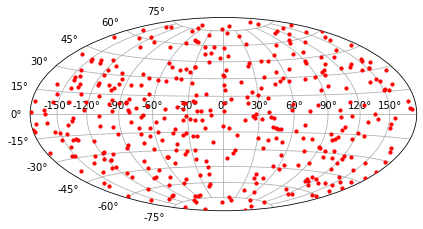

In [104]:
#for 2d we need to convert this points
def convert_cart_to_spherical(xi, yi, zi):
    Theta = np.arccos(zi)-np.pi/2
    Phi = -np.sign(yi)*(np.arctan(yi/xi)+np.pi/2)
    return Theta, Phi
Theta, Phi = convert_cart_to_spherical(xi, yi,zi)
plt.figure(figsize = (6,6))
plt.subplot(projection="hammer")
plt.scatter(Phi, Theta,  s=10, c='r', zorder=10)
plt.grid(True)
plt.tight_layout()

## Uniform distribution on a sphere 2d 

In [149]:
Npoints = 1000
def Create_uniform_angles(Npoints):
    Theta = np.pi*2*np.random.uniform(size = Npoints)-np.pi
    Phi = np.arccos(2*np.random.uniform(size = Npoints)-1)-np.pi/2
    return Theta, Phi

def cumulative_autocorrelation(phi, X):
    """Compute cum. autocorrelation given X where rows of X are xi, yi, zi, 
    i.e. every column is a 3d vector."""
    Ntot = X.shape[1]
    C = []
    for i in range(0,Ntot):
        for j in range(0,i):
            cosphitemp = np.dot(X[:,i], X[:,j])-np.cos(phi)
            C.append(np.heaviside(cosphitemp,0))
    C = np.sum(np.array(C), axis = 0)*2/(Ntot* (Ntot-1))
    return C

In [112]:
def f_isotropic(phi):
    return 1/2*(1-np.cos(phi))

In [150]:
#cumulative_autocorrelation(x_phi, X)-iso

In [176]:
X = sample_spherical(10)
x_phi = np.linspace(0, 2*np.pi,400)
iso = f_isotropic(x_phi)
n_trials = 10000
#a = cumulative_autocorrelation(x_phi, X)
KS_iso = np.empty(n_trials)
for i in range(n_trials):
    X = sample_spherical(10)
    KS_iso[i] = np.max(np.abs(cumulative_autocorrelation(x_phi, X)-iso))
    

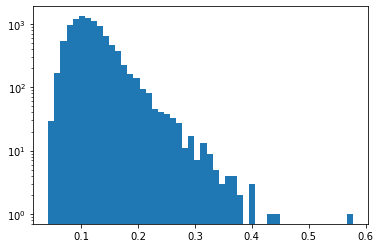

In [177]:
_ = plt.hist(KS_iso, 50)
plt.yscale('log')

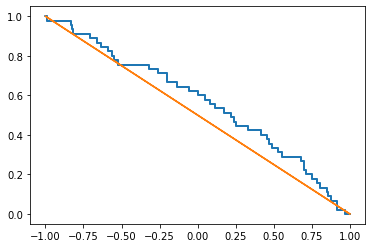

In [174]:
plt.plot(np.cos(x_phi), cumulative_autocorrelation(x_phi, sample_spherical(10)), drawstyle = 'steps-mid')
plt.plot(np.cos(x_phi), iso)